# Dependencies

In [1]:
# Used Functions:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from scipy import stats


# Developed Functions:
from Dev_Fun.Silhouette_Extraction import makeSegMask
from Dev_Fun.Joints_Extraction import mediapipe_detection, draw_landmarks
from Dev_Fun.Calibration_Show import Calib_Show
from Dev_Fun.Dataset_Capture import files_creation, dataset_capture
from Dev_Fun.Cropping_Image import crop_to_person


KeyboardInterrupt: 

# Calibration
<img src="https://www.researchgate.net/profile/Jungpil-Shin/publication/362351225/figure/fig3/AS:1183521695645696@1659184969422/Mediapipe-detects-33-nodes-of-the-human-pose.ppm" width="400px">

In [ ]:
#Feed Input Source
feed = 0
# Calib_Show(feed)

# Setup Folders

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Custom_Gait_Dataset_V.4')
EXPORTED = os.path.join('Exported')

# Persons that we try to detect
persons = np.array(['Lance Moheb','Seif Ibrahim','Mina Nady','Omar Amin','Mohmed Youssef','Hamza Tharwat','Romario Nagy','Ziad Diaa'])

# 10 videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 90

persons_len = len(persons)
total_sequences = persons_len*no_sequences

# Capturing Dataset

In [ ]:
# files_creation(persons,no_sequences,DATA_PATH)
# dataset_capture(persons,no_sequences,DATA_PATH,sequence_length,feed)

# Pre-Processing

* A) Importing Dataset

In [ ]:
label_map = {label:num for num, label in enumerate(persons)}
print(label_map)

{'Lance Moheb': 0, 'Seif Ibrahim': 1, 'Mina Nady': 2, 'Omar Amin': 3, 'Mohmed Youssef': 4, 'Hamza Tharwat': 5, 'Romario Nagy': 6, 'Ziad Diaa': 7}


In [ ]:
sequences, labels = [], []
for person in persons:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, person))).astype(int):
        window = []
        for frame_num in range(sequence_length):

            image_path = os.path.join(DATA_PATH, person, str(sequence), f"{frame_num}.jpg")
            print (image_path)
            res = cv2.imread(image_path)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[person])

Custom_Gait_Dataset_V.4\Lance Moheb\0\0.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\1.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\2.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\3.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\4.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\5.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\6.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\7.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\8.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\9.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\10.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\11.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\12.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\13.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\14.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\15.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\16.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\17.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\18.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\19.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\20.jpg
Custom_Gait_Dataset_V.4\Lance Moheb\0\21.jpg
Custom_Gait_Dataset_

(80, 90, 480, 640, 3)


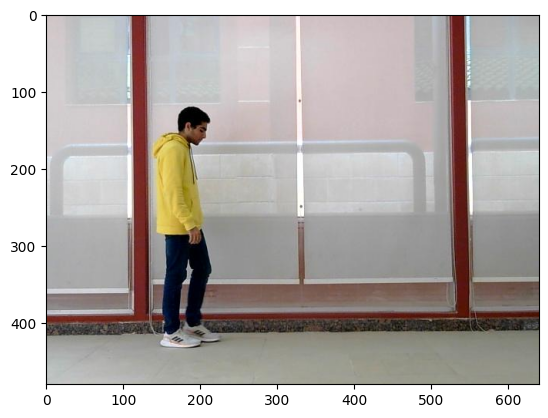

In [ ]:
seqq=np.array(sequences)
print(seqq.shape)
show_test = cv2.cvtColor(seqq[0][30], cv2.COLOR_BGR2RGB)
plt.imshow(show_test)

* B) dataset preproccesing
    * Flip Horizontal
    * Converting to Silhouette
        * Background Subtraction
        * Noise Reduction
        * Binarization
    * convert to gray-scale
    * Resize to CASIA-B Resolution (320x240)

In [ ]:
proccessed = []
fgbg = cv2.createBackgroundSubtractorKNN(detectShadows=False)
for sequence in  range(total_sequences):
# for sequence in  range(1):
    for frame_num in range(sequence_length):

        frame = cv2.cvtColor(seqq[sequence][frame_num], cv2.COLOR_BGR2RGB)

        flip = cv2.flip(frame, 1)

        sil = makeSegMask(flip)

        gray = cv2.cvtColor(sil, cv2.COLOR_BGR2GRAY)

        resize = cv2.resize(gray,(320,240))

        crop = crop_to_person(resize)

        proccessed.append(crop)
        
        print (len(proccessed))

NameError: name 'preproccessed' is not defined

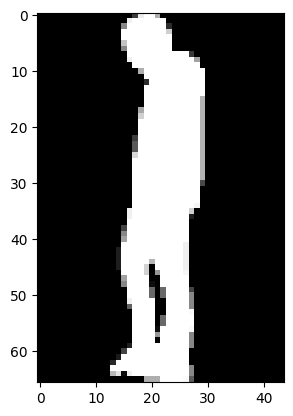

In [ ]:
plt.imshow(exported[30],cmap='gray')

In [ ]:
def create_directories_if_not_exist(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
# Define your dataset path
your_dataset_path = "CASIA-B"

# Define walking conditions
walking_conditions = [
    "bg-01", "bg-02",
    "cl-01", "cl-02",
    "nm-01", "nm-02", "nm-03", "nm-04", "nm-05", "nm-06"
]

# Iterate over subjects
for subject_id in range(119, 128):
    subject_folder = os.path.join(your_dataset_path, str(subject_id))

    # Iterate over walking conditions
    for walking_condition in walking_conditions:
        walking_condition_folder = os.path.join(subject_folder, walking_condition,str("090"))

        # Iterate over frames
        for frame_num in range(90):
            # Define frame name
            frame_name = f"{subject_id}-{walking_condition}-090-{frame_num:03d}.png"
            frame_path = os.path.join(walking_condition_folder, frame_name)

            walking_condition_index = walking_conditions.index(walking_condition)
            index = (subject_id - 119) * len(walking_conditions) * 90 + walking_conditions.index(walking_condition) * 90 + frame_num
            print(index)

            # Check if the image is empty
            if proccessed[index] is None:
                # Create a white image
                image = np.ones((128, 64, 3), dtype=np.uint8) * 255  # Assuming 128x64 is the size of your image
            else:
                image = proccessed[index]

            create_directories_if_not_exist(walking_condition_folder)
            cv2.imwrite(frame_path, image)
            print(f"Exported: {frame_path}")

print("Images exported successfully!")


0
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-000.png
1
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-001.png
2
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-002.png
3
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-003.png
4
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-004.png
5
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-005.png
6
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-006.png
7
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-007.png
8
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-008.png
9
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-009.png
10
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-010.png
11
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-011.png
12
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-012.png
13
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-013.png
14
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-014.png
15
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-015.png
16
Exported: CASIA-B\119\bg-01\090\119-bg-01-090-016.png
17
Exported: CASIA-B\119\bg-01\090\119-bg

IndexError: list index out of range

# Train

A) Splitting Dataset

In [ ]:
# X = np.array(sequences)
# y = to_categorical(labels).astype(int)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# print(X_test.shape)
# print(y_test.shape)

B) Building CNN Architecture

In [ ]:
# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import TensorBoard

In [ ]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60,132)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(persons.shape[0], activation='softmax'))

In [ ]:
# #Compilation
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

C) Training Results

In [ ]:
# model.summary()

In [ ]:
# print("Evaluate on test data")
# results = model.evaluate(X_test, y_test, batch_size=128)
# print("test loss, test acc:", results)

In [ ]:
# res = model.predict(X_test)

In [ ]:
# persons[np.argmax(res[4])]

In [ ]:
# persons[np.argmax(y_test[4])]

In [ ]:
# model.save('train4.h5')

In [ ]:
# yhat = model.predict(X_test)

In [ ]:
# ytrue = np.argmax(y_test, axis=1).tolist()
# yhat = np.argmax(yhat, axis=1).tolist()

# multilabel_confusion_matrix(ytrue, yhat)

# accuracy_score(ytrue, yhat)

# Detection

In [ ]:
# colors = [(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16),(245,117,16)]
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 1, cv2.LINE_AA)
        
#     return output_frame

In [ ]:
# # 1. New detection variables
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.3

# cap = cv2.VideoCapture(feed)
# # Set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_landmarks(image, results)
        
#         # 2. Prediction logic
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-60:]
        
#         if len(sequence) == 60:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(persons[np.argmax(res)])
#             predictions.append(np.argmax(res))
            
            
#         #3. Viz logic
#             if np.unique(predictions[-10:])[0]==np.argmax(res): 
#                 if res[np.argmax(res)] > threshold: 
                    
#                     if len(sentence) > 0: 
#                         if persons[np.argmax(res)] != sentence[-1]:
#                             sentence.append(persons[np.argmax(res)])
#                     else:
#                         sentence.append(persons[np.argmax(res)])

#             if len(sentence) > 5: 
#                 sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, persons, image, colors)
            
#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
                
#         cv2.putText(image, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1, cv2.LINE_AA)
        
#         # Show to screen
#         cv2.imshow('Gait ID', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == 27:
#             break
#     cap.release()
#     cv2.destroyAllWindows()